In [ ]:
%autosave 10

**First, create a dataframe of *cleaned_data.csv*. Then, use scikit-learn's `train_test_split` to make a new set of training and testing data. This time, instead of `EDUCATION`, use `LIMIT_BAL`: the account's credit limit.**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('cleaned_data.csv')
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
df['LIMIT_BAL'].values.reshape(-1,1), df['default payment next month'].values,
test_size=0.2, random_state=24)

_________________________________________________________________________
**Next, train a logistic regression model using the training data from your split.**


In [5]:
from sklearn.linear_model import LogisticRegression
my_lr = LogisticRegression()
my_lr.fit(X_train, y_train)
y_pred=my_lr.predict(X_test)
y_pred1=my_lr.predict_proba(X_test)


In [4]:
is_correct = y_pred == y_test
np.mean(is_correct)

0.7834239639977498

_________________________________________________________________________
**Then, create the array of predicted probabilities for the testing data.**


In [6]:
y_pred1

array([[0.74826924, 0.25173076],
       [0.584297  , 0.415703  ],
       [0.79604453, 0.20395547],
       ...,
       [0.584297  , 0.415703  ],
       [0.82721498, 0.17278502],
       [0.66393434, 0.33606566]])

_________________________________________________________________________
**Next, calculate the ROC AUC using the predicted probabilities and the true labels of the testing data. Compare this to the ROC AUC from using the `EDUCATION` feature.**


In [57]:
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred)
P = sum(y_test)
TP = sum( (y_test==1) & (y_pred==1) )
TPR = TP/P
FN = sum( (y_test==1) & (y_pred==0) )
FNR = FN/P
N = sum(y_test==0)
TN = sum((y_test==0) & (y_pred==0))
FP = sum((y_test==0) & (y_pred==1))
TNR = TN/N
FPR = FP/N
print("TP :",TP)
print("TN :",TN)
print("FP :",FP)
print("FN :",FN)

print('The true negative rate is {} and the false positive rate is {}'.format(TNR, FPR))
metrics.confusion_matrix(y_test, y_pred)

TP : 0
TN : 4178
FP : 0
FN : 1155
The true negative rate is 1.0 and the false positive rate is 0.0


array([[4178,    0],
       [1155,    0]], dtype=int64)

_________________________________________________________________________
**Now, plot the ROC curve.**


Text(0,0.5,'Number of samples')

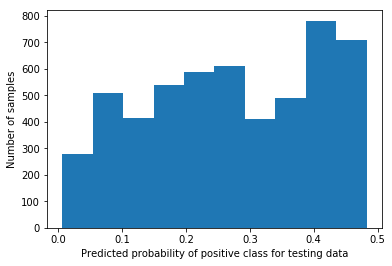

In [80]:
y_pred_proba = my_lr.predict_proba(X_test)
prob_sum = np.sum(y_pred_proba,1)
pos_proba = y_pred_proba[:,1]
plt.hist(pos_proba)
plt.xlabel('Predicted probability of positive class for testing data')
plt.ylabel('Number of samples')


Text(0,0.5,'Number of samples')

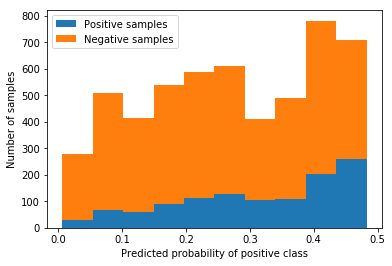

In [81]:
pos_sample_pos_proba = pos_proba[y_test==1]
neg_sample_pos_proba = pos_proba[y_test==0]
plt.hist([pos_sample_pos_proba, neg_sample_pos_proba], histtype='barstacked')
plt.legend(['Positive samples', 'Negative samples'])
plt.xlabel('Predicted probability of positive class')
plt.ylabel('Number of samples')

Text(0.5,1,'ROC curve')

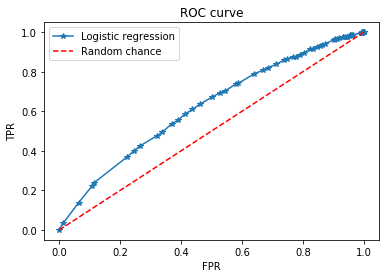

In [82]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, pos_proba)
plt.plot(fpr, tpr, '*-')
plt.plot([0, 1], [0, 1], 'r--')
plt.legend(['Logistic regression', 'Random chance'])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')

_________________________________________________________________________
**Then, calculate the data for the precision-recall curve on the testing data using scikit-learn functionality.**


In [84]:
metrics.roc_auc_score(y_test, pos_proba)

0.6201990844642832

_________________________________________________________________________
**Plot the precision-recall curve using matplotlib.**


Text(0.5,1,'precision-recall curve')

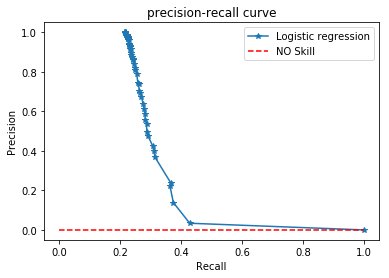

In [96]:
precision, recall, thresholds = metrics.precision_recall_curve(y_test, pos_proba)
plt.plot(precision,recall,'*-')
plt.plot([0, 1],[0,0],'r--')
plt.legend(['Logistic regression', 'NO Skill'])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('precision-recall curve')

_________________________________________________________________________
**Now, use scikit-learn to calculate the area under the precision-recall curve.**


In [101]:
area=metrics.auc(recall,precision)
print(area)

0.31566964427378624


_________________________________________________________________________
**Finally, recalculate the ROC AUC, except this time do it for the training data.**

In [119]:
#Get the training ROC AUC

y_pred_proba1=my_lr.predict_proba(X_train)
print(metrics.roc_auc_score(y_train,y_pred_proba1[:,1]))

0.6182918113358344


    How is this different, conceptually and quantitatively, from your earlier calculation?
